In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Einführung in die Zeitreihenanalyse
## Klassifikation von Zeitserien, Beispiele, Begrifflichkeiten

Folgende Eigenschaften dienen zur Klassifikation von Zeitserien:

 *   **Periodisch**
 *   **Deterministisch**
 *   **Stochastisch**
 *   **Stationär**
 *   **Ergodisch**

Aufgabe: Versuchen Sie die folgenden Zeitserien anhand des visuellen Eindrucks zu klassifizieren. Versuchen Sie den Ursprung der Daten zu erraten. Erkennen Sie charakteristische geophysikalische Zeitreihen wieder?

Es folgt zunächst der Python-Programmcode zur Ausgabe der Plots. Weiter unten ist des Rätsels Lösung.


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


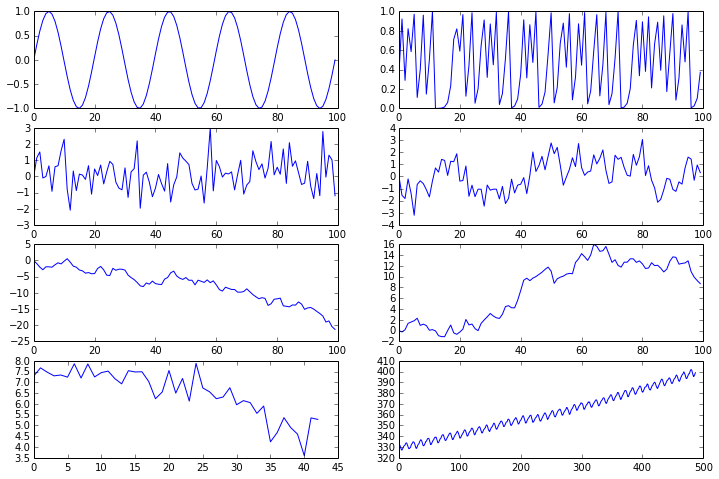

In [13]:
# Aktivieren der Inline-Ausgabe von Grafiken
%pylab inline 
import glob # Importieren des GLOB-Moduls

file_list=glob.glob('beispiele/*.txt') # Such nach passenden Dateien mit Platzhaltern (Stern, Fragezeichen)
file_list.sort() # Files in aufsteigender Reihenfole sortieren

figure(figsize=(12,8)) # Öffne neues Fenster zur graphischen Ausgabe
for i,f in enumerate(file_list): # Schleife über alle gefundenen Dateien, Zählervariable i,f
    subplot(4,2,i+1)
    plot(loadtxt(f)) # Lese und plotte Inhalt der Datei f 
    

# Deterministische Zeitserien

Deterministische Zeitserien können durch einen mathematischen Zusammenhang exakt beschrieben werden. Sie sind entweder periodisch oder nicht-periodisch. 

## Periodische Zeitserien

Periodische Zeitreihen wiederholen sich nach einem regulären Intervall (der Periode $T_p$)

$$x(t)=x(t\pm n T_p)$$

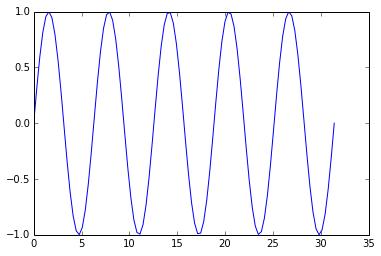

In [2]:
N=100
#X=zeros(N)
t=linspace(0,10*pi,N)
Y=sin(t)
plot(t,Y)
Y.tofile('beispiele/beispiel_01.txt',sep=' ',format='%s')



# Logistische Gleichung

Die [Logistische Gleichung](http://de.wikipedia.org/wiki/Logistische_Gleichung) ist ein Beispiel für eine deterministische Zeitserie

 $$x_{n+1} = r x_n (1-x_n)$$

Die Lösung dieser einfachen nicht-linearen Gleichung zeigt ein komplexes chaotisches Verhalten. Kleine Änderungen im Anfangszustand führen zu großen Abweichungen nach wenigen Zeitschritten. Trotz dieses chaotischen Verhaltens erhält man für exakt dieselben Anfangsbedindungen und Parameter exakt die gleiche Zeitreihe. Die Zeitserie ist deterministisch, da keine zufälligen Elemente vorhanden sind.



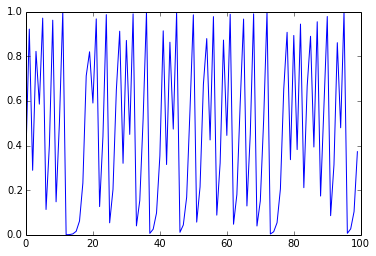

In [3]:
N=100
X=zeros(N)
x=0.1
r=4
for i in range(N):
    x=r*x*(1-x)
    X[i]=x
plot(X)

X.tofile('beispiele/beispiel_02.txt',sep=' ')

# Stochastische Zeitreihen

Stochastische Zeitreihen bestehen aus Folgen von Zufallsvariablen. Bleiben dabei (für einen Zeitraum) [stochastische Momente](http://de.wikipedia.org/wiki/Moment_%28Stochastik%29) erhalten, spricht man von Stationarität (bezüglich dieser Momente und des Zeitraums). Sind Mittelwert über Zeit und Ensemble identisch, spricht man von einem ergodischen System. 

Als stochastische Prozesse werden alle Rechenvorschriften bezeichnet, die eine stochastische Zeitreihe erzeugen. 

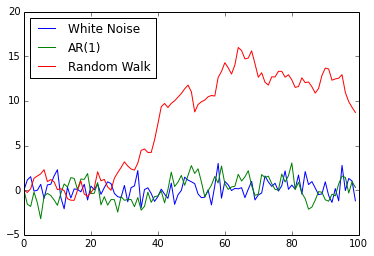

In [4]:
def stochastischer_prozess(N,alpha,beta):
    Y=zeros(N)
    for i in range(1,N):
        Y[i]=Y[i-1]*alpha+beta*randn(1)
    return Y

N=100
Y_white_noise=stochastischer_prozess(N,0.0,1.0)
Y_AR1=stochastischer_prozess(N,0.7,1.0)
Y_random_walk=stochastischer_prozess(N,1.0,1.0)

plot(Y_white_noise, label='White Noise')
plot(Y_AR1,label='AR(1)')
plot(Y_random_walk,label='Random Walk')
legend(loc=2)

Y_white_noise.tofile('beispiele/beispiel_03.txt',sep=' ')
Y_AR1.tofile('beispiele/beispiel_04.txt',sep=' ')
Y_random_walk.tofile('beispiele/beispiel_06.txt',sep=' ') # 05.txt ist zufaellig aehnlich wie meereis-zeitreihe


# Geophysikalische Parameter

Unter geophysikalischen Parametern verstehen wir im englischen Sprachgebrauch Variablen, die in den Erdwissenschaften (inklusive Ozean, Atmosphäre etc.) vorkommen, nicht nur die der "Geophysik". 

Geophysikalische Zeitreihen sind aufgrund der Messungenauigkeit und der Zufälligkeit immer stochastisch. Sie können aber manchmal durch deterministische Gleichungen und einen zufälligen Anteil beschrieben werden. Im einfachsten Fall ist die deterministische Gleichung ein lineares Modell zur Beschreibung des Trends. Oft ist der Trend von einem periodischen Jahresgang überlagert, welcher ebenfalls durch ein deterministisches Modell beschrieben werden kann.



## Meereis-Ausdehnung im September

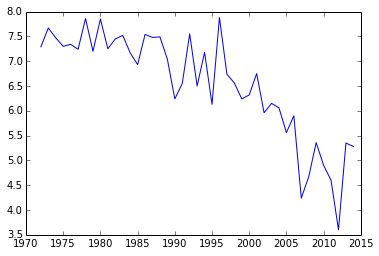

In [5]:
D=loadtxt('data/september_extent_1972_2014.txt')
t=D[:,0]
X=D[:,1]
plot(t,X)
X.tofile('beispiele/beispiel_07.txt',sep=' ')


## Mauna Loa CO$_2$ 

In [9]:
#!wget  ftp://aftp.cmdl.noaa.gov/data/greenhouse_gases/co2/in-situ/surface/mlo/co2_mlo_surface-insitu_1_ccgg_MonthlyData.txt
#!mv co2_mlo_surface-insitu_1_ccgg_MonthlyData.txt data

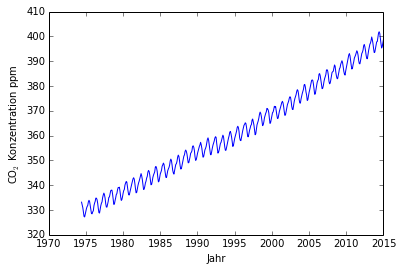

In [12]:
D=loadtxt('data/co2_mlo_surface-insitu_1_ccgg_MonthlyData.txt',skiprows=128,usecols=(1,2,7))
t=D[4:,0]+D[4:,1]/12.0
CO2=D[4:,2]
plot(t,CO2)
xlabel('Jahr')
ylabel('CO$_2$ Konzentration ppm')
CO2.tofile('beispiele/beispiel_08.txt',sep=' ')